In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("AutomobilePriceDataRaw.csv")

In [4]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
df.shape

(205, 26)

In [7]:
df['normalized-losses'].dtype

dtype('O')

In [8]:
# Iterate through each columns with the datatype object and get the count of '?' in each columns

for column in df.columns:
    if df[column].dtype==object:
        count =0
        count = [ count+1 for value in df[column] if value=='?']
        print(column+' '+str(sum(count)))


normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
engine-type 0
num-of-cylinders 0
fuel-system 0
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [13]:
df.drop('normalized-losses', axis=1, inplace=True)

In [14]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
df.shape

(205, 25)

In [22]:
columns=['price','peak-rpm','horsepower','stroke','bore']
for col in columns:
    df.loc[df[col]=='?',col] = np.nan
#     df[col]=np.nan for value in df[col] if value=='?'
df.dropna(axis=0, inplace=True) 
df.shape

(195, 25)

### Converting numeric colums with object datatype to numeric

In [23]:
for column in columns:
    df[column] = pd.to_numeric(df[column])

In [24]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Working with categorical columns

- When a categorical column hv lot of unique values, what we hv to do is "Aggregation on categorical columns".
- This has to be done by a person who know the industry/domain.
- If the number of unique values are small, then we dont need to worry.


In [25]:
df['make'].value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

In [28]:
df['num-of-cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [33]:
df.columns = [ column.replace('-','_') for column in df.columns]

In [34]:
new_num_of_cylinders = {
    "three":'three_four',
    "four":'three_four',
    'five':'five_six',
    'six':'five_six',
    'eight':'eight_twelve',
    'twelve':'eight_twelve'
}

df['num_of_cylinders']=[ new_num_of_cylinders[x] for x in df['num_of_cylinders']]
# df['num_of_cylinders'].map(new_num_of_cylinders)

In [36]:
df['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

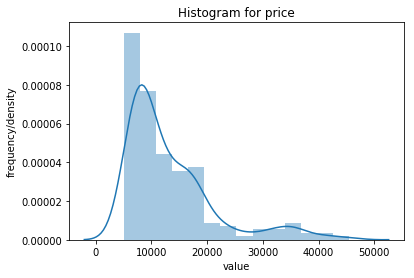

In [40]:
def draw_hist(values, label):
    sns.distplot(values)
    plt.xlabel('value')
    plt.ylabel('frequency/density')
    plt.title('Histogram for '+label)

draw_hist(df['price'],'price')

here we can slighly see, two bell shapes, the reason for that is, the data may hv been collected from two different sources. The reason for that two bells is data arent align well

if we are sure about not getting values 0 or below 0, the best scale to use is 'log'

In [42]:
df['log_price']=np.log(df['price'])

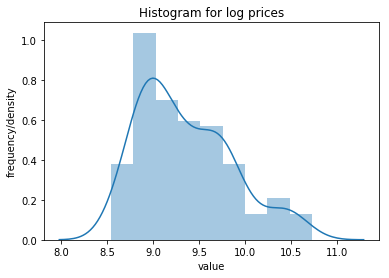

In [43]:
draw_hist(df['log_price'],'log prices')

we hv to apply dummy variables for each possible value for categorical values in a column

In [49]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(df['num_of_cylinders'])
features=label_encoder.transform(df['num_of_cylinders'])
print(features)
features.shape
# df['num_of_cylinders'].unique()
# one_hot_encoded=ohe.fit_transform()


[2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 1 1 2]


(195,)

In [61]:
one_hot_encoder=OneHotEncoder()
onehotfeatures = one_hot_encoder.fit_transform(features.reshape(-1,1)).toarray()

/Users/kanishka/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [62]:
onehotfeatures

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [68]:
features=np.concatenate([onehotfeatures,np.array(df[['peak_rpm','city_mpg']])],axis=1)
features

array([[0.00e+00, 0.00e+00, 1.00e+00, 5.00e+03, 2.10e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.00e+03, 2.10e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.00e+03, 1.90e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.50e+03, 2.40e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+03, 1.80e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+03, 1.90e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+03, 1.90e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+03, 1.90e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+03, 1.70e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.80e+03, 2.30e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.80e+03, 2.30e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.25e+03, 2.10e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.25e+03, 2.10e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.25e+03, 2.00e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.40e+03, 1.60e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.40e+03, 1.60e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.40e+03, 1.50e+01

In [66]:
df['peak_rpm'].head()

0    5000
1    5000
2    5000
3    5500
4    5500
Name: peak_rpm, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit_transform(features[:,3:])

array([[-2.13003109e-01, -6.85104982e-01],
       [-2.13003109e-01, -6.85104982e-01],
       [-2.13003109e-01, -9.98341727e-01],
       [ 8.57502208e-01, -2.15249866e-01],
       [ 8.57502208e-01, -1.15496010e+00],
       [ 8.57502208e-01, -9.98341727e-01],
       [ 8.57502208e-01, -9.98341727e-01],
       [ 8.57502208e-01, -9.98341727e-01],
       [ 8.57502208e-01, -1.31157847e+00],
       [ 1.49980540e+00, -3.71868238e-01],
       [ 1.49980540e+00, -3.71868238e-01],
       [-1.81876109e+00, -6.85104982e-01],
       [-1.81876109e+00, -6.85104982e-01],
       [-1.81876109e+00, -8.41723355e-01],
       [ 6.43401145e-01, -1.46819684e+00],
       [ 6.43401145e-01, -1.46819684e+00],
       [ 6.43401145e-01, -1.62481522e+00],
       [ 1.09795417e-03,  3.38697270e+00],
       [ 6.43401145e-01,  1.97740735e+00],
       [ 6.43401145e-01,  1.97740735e+00],
       [ 8.57502208e-01,  1.82078897e+00],
       [ 8.57502208e-01,  8.81078741e-01],
       [ 8.57502208e-01, -2.15249866e-01],
       [ 8.

In [74]:
import sklearn.model_selection as ms

In [75]:
index= range(features.shape[0])
index= ms.train_test_split(index, test_size=.3)

In [77]:
x_train=features[index[0],:]
x_test=features[index[0],:]
print(x_train)
print(x_test)

[[0.00e+00 0.00e+00 1.00e+00 5.40e+03 2.40e+01]
 [0.00e+00 0.00e+00 1.00e+00 4.90e+03 3.10e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.00e+03 3.10e+01]
 [0.00e+00 1.00e+00 0.00e+00 5.20e+03 1.70e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.00e+03 2.10e+01]
 [0.00e+00 0.00e+00 1.00e+00 4.80e+03 2.40e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.20e+03 3.10e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.80e+03 2.70e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.20e+03 3.10e+01]
 [0.00e+00 1.00e+00 0.00e+00 5.20e+03 2.00e+01]
 [0.00e+00 0.00e+00 1.00e+00 4.20e+03 2.70e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.40e+03 3.80e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.80e+03 2.70e+01]
 [0.00e+00 1.00e+00 0.00e+00 5.50e+03 1.80e+01]
 [0.00e+00 1.00e+00 0.00e+00 5.20e+03 1.90e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.80e+03 2.30e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.00e+03 1.90e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.50e+03 1.90e+01]
 [0.00e+00 1.00e+00 0.00e+00 5.40e+03 1.60e+01]
 [0.00e+00 0.00e+00 1.00e+00 4.80e+03 3.00e+01]
 [0.00e+00 0.00e+00 1.00e+00 5.50e+03 3.